<b>Google Colab</b> <a href="https://colab.research.google.com/github/kirillzyusko/deeplearning/blob/master/4/lab.ipynb">link</a>

# **Introduction**

In the beginning of this lab I wanted to complete it using YOLO alghorithm. However, when I read more resources I found proposed neural network architecture, that I should try to use. So I stick with this option.

<div style="align-items: center; justify-content: center">
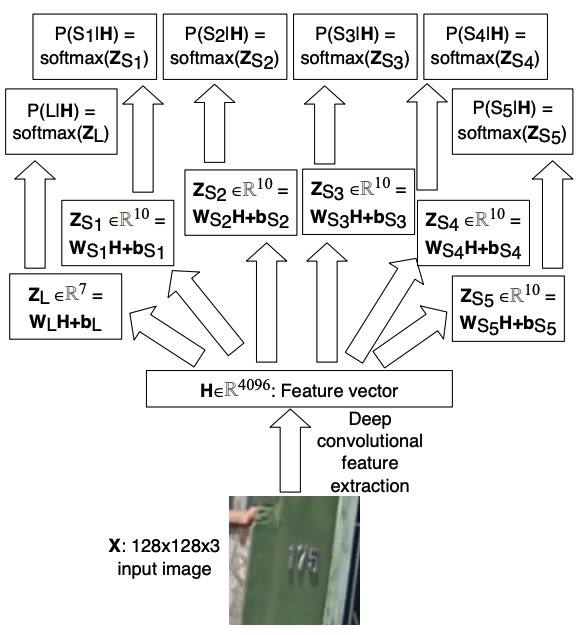</img>
<i style="align-items: center; justify-content: center">Picture 1 - proposed architecture of a neural network</i>
</div>

# **Part 1-1: Download and extract SVNH dataset**

Publication: https://arxiv.org/abs/1312.6082

In [0]:
!wget "http://ufldl.stanford.edu/housenumbers/train_32x32.mat"
!wget "http://ufldl.stanford.edu/housenumbers/test_32x32.mat"
!wget "http://ufldl.stanford.edu/housenumbers/extra_32x32.mat"

In [1]:
!wget "http://ufldl.stanford.edu/housenumbers/train.tar.gz"
!wget "http://ufldl.stanford.edu/housenumbers/test.tar.gz"
!wget "http://ufldl.stanford.edu/housenumbers/extra.tar.gz"

--2020-03-12 20:22:55--  http://ufldl.stanford.edu/housenumbers/train.tar.gz
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 404141560 (385M) [application/x-gzip]
Saving to: ‘train.tar.gz’

train.tar.gz        100%[===================>] 385.42M  18.2MB/s    in 23s     

2020-03-12 20:23:18 (17.0 MB/s) - ‘train.tar.gz’ saved [404141560/404141560]

--2020-03-12 20:23:19--  http://ufldl.stanford.edu/housenumbers/test.tar.gz
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276555967 (264M) [application/x-gzip]
Saving to: ‘test.tar.gz’

test.tar.gz         100%[===================>] 263.74M  19.8MB/s    in 16s     

2020-03-12 20:23:36 (16.6 MB/s) - ‘test.tar.gz’ saved [276555967/2

Extract .zip

In [0]:
!mkdir train
!mkdir test
!mkdir extra
!tar xvzf train.tar.gz -C train
!tar xvzf test.tar.gz -C test
!tar xvzf extra.tar.gz -C extra

In [0]:
%ls

extra/  extra.tar.gz  sample_data/  test/  test.tar.gz  train/  train.tar.gz


Read data:

In [0]:
from scipy.io import loadmat

train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')
extra = loadmat('test_32x32.mat')

X_train = train['X']
y_train = train['y']
X_test = test['X']
y_test = test['y']

Check the data:

In [0]:
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (32, 32, 3, 73257)
y_train.shape:  (73257, 1)
X_test.shape:  (32, 32, 3, 26032)
y_test.shape:  (26032, 1)


Since we now know the structure of the data, we can visulize it:

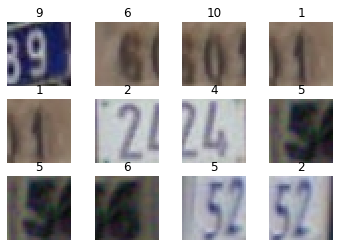

In [0]:
import matplotlib.pyplot as plt

X_train = X_train[:,:,:,:]
X_test = X_test[:,:,:,:]

start = 50

fig, ax = plt.subplots(3, 4)
for row in range(3):
    for col in range(4):
        ax[row, col].imshow(X_train[:,:,:,start+row*3+col])
        ax[row, col].axis('off')
        ax[row, col].set_title('{}'.format(y_train[start+row*3+col, 0]))
plt.show()

# **Part 1-2: Download and extract MNIST dataset**

In [0]:
from keras.datasets import mnist


# the data, split between train and test sets
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

x_train_mnist = x_train_mnist / 255
y_train_mnist = y_train_mnist / 255
x_test_mnist = x_test_mnist / 255
y_test_mnist = y_test_mnist / 255

# **Part 1-3: Build a NN model**

Const declaration

In [0]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

NN model

In [4]:
from keras import Input, Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

# input layer
input = Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS), name="input")

# 1 layer
hidden1 = Conv2D(48, (5,5), activation='relu', padding='same')(input)
hidden1 = BatchNormalization()(hidden1)
hidden1 = MaxPooling2D(padding='same')(hidden1)
hidden1 = Dropout(0.25)(hidden1)

# 2 layer
hidden2 = Conv2D(64, (5,5), activation='relu', padding='same')(hidden1)
hidden2 = BatchNormalization()(hidden2)
hidden2 = MaxPooling2D(padding='same',strides=1)(hidden2)
hidden2 = Dropout(0.25)(hidden2)

# 3 layer
hidden3 = Conv2D(128, (5,5), activation='relu', padding='same')(hidden2)
hidden3 = BatchNormalization()(hidden3)
hidden3 = MaxPooling2D(padding='same')(hidden3)
hidden3 = Dropout(0.25)(hidden3)

# 4 layer
hidden4 = Conv2D(160, (5,5), activation='relu', padding='same')(hidden3)
hidden4 = BatchNormalization()(hidden4)
hidden4 = MaxPooling2D(padding='same',strides=1)(hidden4)
hidden4 = Dropout(0.25)(hidden4)

# 5 layer
hidden5 = Conv2D(192, (5,5), activation='relu', padding='same')(hidden4)
hidden5 = BatchNormalization()(hidden5)
hidden5 = MaxPooling2D(padding="same")(hidden5)
hidden5 = Dropout(0.25)(hidden5)

# 6 layer
hidden6 = Conv2D(192, (5,5), activation='relu', padding='same')(hidden5)
hidden6 = BatchNormalization()(hidden6)
hidden6 = MaxPooling2D(padding='same',strides=1)(hidden6)
hidden6 = Dropout(0.25)(hidden6)

# 7 layer
hidden7 = Conv2D(192, (5,5), activation='relu', padding='same')(hidden6)
hidden7 = BatchNormalization()(hidden7)
hidden7 = MaxPooling2D(padding='same')(hidden7)
hidden7 = Dropout(0.25)(hidden7)

# 8 layer
hidden8 = Conv2D(192, (5,5), activation='relu', padding='same')(hidden7)
hidden8 = BatchNormalization()(hidden8)
hidden8 = MaxPooling2D(padding='same',strides=1)(hidden8)
hidden8 = Dropout(0.25)(hidden8)

# flatten layer
flatten = Flatten()(hidden8)

# 1 dense layer
dense1 = Dense(4096, kernel_initializer='normal', activation='relu')(flatten)
#dropout1 = Dropout(0.25)(dense1)

# 2 dense layer
dense2 = Dense(4096, kernel_initializer='normal', activation='relu')(dense1)

# output layers
# 11 = 0..9 + 1 class NaN
length = Dense(6, activation='softmax', name='length')(dense2)
digit1 = Dense(11, activation='softmax', name='digit1')(dense2)
digit2 = Dense(11, activation='softmax', name='digit2')(dense2)
digit3 = Dense(11, activation='softmax', name='digit3')(dense2)
digit4 = Dense(11, activation='softmax', name='digit4')(dense2)
digit5 = Dense(11, activation='softmax', name='digit5')(dense2)

model = Model(inputs=input, outputs=[length,digit1,digit2,digit3,digit4,digit5])

model.summary()

# use sparse, since it allows not use one-hot encoding
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.save('initial.h5')












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 48) 3648        input[0][0]                      
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 48) 192         conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 64, 64, 48)   0          

# **Part 1: Train on mnist dataset**

# **Part 2: Train on svnh dataset**

Dataset preprocessing:

In [5]:
import h5py
import pandas as pd
import numpy as np

MAX_LENGTH = 5
NOT_A_NUMBER = 10

# The DigitStructFile is just a wrapper around the h5py data. It basically references 
#    inf:              The input h5 matlab file
#    digitStructName   The h5 ref to all the file names
#    digitStructBbox   The h5 ref to all struct data
class DigitStructFile:
    def __init__(self, inf):
        self.inf = h5py.File(inf, 'r')
        self.digitStructName = self.inf['digitStruct']['name']
        self.digitStructBbox = self.inf['digitStruct']['bbox']

    # getName returns the 'name' string for for the n(th) digitStruct. 
    def getName(self, n):
        return ''.join([chr(c[0]) for c in self.inf[self.digitStructName[n][0]].value])

    # bboxHelper handles the coding difference when there is exactly one bbox or an array of bbox. 
    def bboxHelper(self, attr):
        if (len(attr) > 1):
            attr = [self.inf[attr.value[j].item()].value[0][0] for j in range(len(attr))]
        else:
            attr = [attr.value[0][0]]
        return attr

    # Return a restructured version of the dataset.
    #
    #   Return a list of such dicts:
    #      'filename': filename of the samples
    #      'labels': list of such digits presented by an 6-array
    #
    # Note: We may turn this to a generator, if memory issues arise.
    def getAllDigitStructure(self):
        labels = []
        filenames=[]

        for i in range(len(self.digitStructBbox)):
            bbox = self.digitStructBbox[i].item()
            label_attribute = self.inf[bbox]['label']
            label = self.bboxHelper(label_attribute)
            # since one of the numbers has 6 numbers! (it is > 5)
            label = [0 if digit == 10 else digit for digit in label]
            length = len(label)

            name = self.getName(i)

            if (length > MAX_LENGTH):
                continue

            for _ in range(MAX_LENGTH - length):
                label.append(NOT_A_NUMBER)
            label.append(length)

            labels.append(label)
            filenames.append(name)

        return np.array(filenames), np.array(labels)

    def to_dataframe(self):
        filenames, labels = self.getAllDigitStructure()

        return pd.DataFrame({
          'filename': filenames,
          'length': labels[:,5],
          'digit1': labels[:,0],
          'digit2': labels[:,1],
          'digit3': labels[:,2],
          'digit4': labels[:,3],
          'digit5': labels[:,4]
      })


df = DigitStructFile('train/train/digitStruct.mat').to_dataframe()

df.head()

,filename,length,digit1,digit2,digit3,digit4,digit5
0,1.png,2.0,1.0,9.0,10.0,10.0,10.0
1,2.png,2.0,2.0,3.0,10.0,10.0,10.0
2,3.png,2.0,2.0,5.0,10.0,10.0,10.0
3,4.png,2.0,9.0,3.0,10.0,10.0,10.0
4,5.png,2.0,3.0,1.0,10.0,10.0,10.0


Display one of the image:

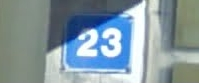

In [6]:
from IPython.display import Image

Image('train/train/2.png')

Dataset split

In [0]:
from sklearn.model_selection import train_test_split
df = df[0:100]
train, val = train_test_split(df, test_size=0.20)

Image generator:

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# use data augmentation
train_datagen_aug = ImageDataGenerator(
      #rotation_range=10,
      rescale=1./255,
      #shear_range=0.1,
      #zoom_range=0.1,
      #width_shift_range=0.1,
      #height_shift_range=0.1
)

test_gen = ImageDataGenerator(rescale=1./255)

Data flows:

In [12]:
TRAIN_PATH = 'train/train'
TEST_PATH = 'test/test'

y_col = ['length', 'digit1', 'digit2', 'digit3', 'digit4', 'digit5']
total_train = train.shape[0]
total_validate = val.shape[0]
batch_size = 32  # since Andrew Ng told, that better use 2^n

train_generator = train_datagen_aug.flow_from_dataframe(
    train, 
    TRAIN_PATH, 
    x_col='filename',
    y_col=y_col,
    target_size=IMAGE_SIZE,
    class_mode='multi_output',
    batch_size=batch_size
)

val_generator = test_gen.flow_from_dataframe(
    val, 
    TRAIN_PATH, 
    x_col='filename',
    y_col=y_col,
    target_size=IMAGE_SIZE,
    class_mode='multi_output',
    batch_size=batch_size
)

Found 80 validated image filenames.
Found 20 validated image filenames.


Train NN:

In [13]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

# define the checkpoint
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history = model.fit_generator(
    train_generator, 
    epochs=320,
    validation_data=val_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    #callbacks=callbacks_list
)

#model = load_model("model.h5")

Epoch 1/320
2/2 [==============================] - 2s 775ms/step - loss: 46.4515 - length_loss: 12.0886 - digit1_loss: 15.3905 - digit2_loss: 14.3832 - digit3_loss: 4.3094 - digit4_loss: 0.2798 - digit5_loss: 1.0729e-06 - length_acc: 0.2500 - digit1_acc: 0.0451 - digit2_acc: 0.1076 - digit3_acc: 0.7326 - digit4_acc: 0.9826 - digit5_acc: 1.0000 - val_loss: 48.3543 - val_length_loss: 14.5063 - val_digit1_loss: 15.3122 - val_digit2_loss: 15.3122 - val_digit3_loss: 2.4177 - val_digit4_loss: 0.8059 - val_digit5_loss: 1.0729e-06 - val_length_acc: 0.1000 - val_digit1_acc: 0.0500 - val_digit2_acc: 0.0500 - val_digit3_acc: 0.8500 - val_digit4_acc: 0.9500 - val_digit5_acc: 1.0000
Epoch 2/320
2/2 [==============================] - 0s 234ms/step - loss: 47.5708 - length_loss: 12.6482 - digit1_loss: 13.7116 - digit2_loss: 14.8309 - digit3_loss: 4.9250 - digit4_loss: 1.4551 - digit5_loss: 1.0729e-06 - length_acc: 0.2153 - digit1_acc: 0.1493 - digit2_acc: 0.0799 - digit3_acc: 0.6944 - digit4_acc: 0.9

# **Part 3: ?**

# **Part 4: Export model to tensorflow lite**

Convert model to tensorflow lite, in order to use it on weak devices:

In [15]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model_file('initial.h5') 
tfmodel = converter.convert() 
open("model.tflite", "wb").write(tfmodel)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 64 variables.
INFO:tensorflow:Converted 64 variables to const ops.


286785448

Download lite model:

In [0]:
from google.colab import files

files.download('model.tflite') 

# **Afterward. Test result**

Write here about my results. Attach various screenshots.

# **Resources**

- Publication from youtube link: https://arxiv.org/abs/1312.6082
- https://github.com/penny4860/Yolo-digit-detector
- https://github.com/dyckia/SVHN-CNN/blob/master/SVHN.ipynb